<a href="https://colab.research.google.com/github/merriekay/CS66_F24/blob/main/Day20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hash Table Data Structure, Implementing Sets and Maps ADTs
## Day20

### CS66: Introduction to Computer Science II | Fall 2024

Tuesday, November 12th, 2024

### Helpful Resources:
[📜 Syllabus](https://docs.google.com/document/d/1lnkmnAm0tfw2ybqhS01ylSqKfkOcAAkmrrZUuDjwHuU/edit?usp=drive_link) | [📬 CodePost Login](https://codepost.io/login) | [📆 Schedule](https://docs.google.com/spreadsheets/d/1FW9s8S04zqpOaA13JyrlNPszk5D-H9dBi7xX6o5VpgY/edit?usp=drive_link) | [🙋‍♂️ PollEverywhere](https://pollev.com/moore) | [🪴 Office Hour Sign-Up](https://calendly.com/meredith-moore/office-hours)

# Announcements:

### You should be working on:
[Assignment #10](https://analytics.drake.edu/~moore/CS66-F24/Assignment10.html), released today, due Tuesday November 12th, by 11:59pm

# ⏪ Quick Review
_improving search_

## Binary Search

__Binary Search__ works by looking at the middle item within a given range and throwing out at least half the items on each iteration.

_only works on a sorted data structure_

Let's draw some pictures on the board to see how this works.

In [4]:
def binarySearch(alist, item):
    first = 0
    last = len(alist)-1
    found = False

    while first<=last and not found:
        midpoint = (first + last)//2
        if alist[midpoint] == item:
            found = True
        else:
            if item < alist[midpoint]:
                last = midpoint-1
            else:
                first = midpoint+1

    return found

testlist = [0, 1, 2, 8, 13, 17, 19, 32, 42,]
print(binarySearch(testlist, 3))
print(binarySearch(testlist, 13))

False
True


## O(1) search

Sequential Search is $O(n)$

Binary Search is $O(\log n)$

Is it possible to do search in $O(1)$ time?


#### An Idea

Let's say we have a collection of values to store like 1, 5, 6, 7, 9, 10, 13, 15, 18.

We could represent this in a list like this:

In [5]:
my_collection = [None,1,None,None,None,5,6,7,None,9,10,None,None,13,None,15,None,None,18,None]

Now, we can search if a value is in the collection by looking it up at its index. If it is not in the collection, `None` will be returned.

In [6]:
print( my_collection[5] )
print( my_collection[18] )
print( my_collection[4] )
print( my_collection[17] )

5
18
None
None


## Review: Hash Tables

Hash tables work like the above approach, except it allows for values outside of indices of the table using a __hash function__.

Hash functions can be any function that transforms a value into a suitable index for the list. 

For example:

In [1]:
hash_table_size = 10
hash_table = [None] * 10 #initialize all 10 spots to None

def simple_hash(value,num_items):
    return value % num_items

print("Initialized table;",hash_table)

#putting the value 87 into the hash table
hash_table[ simple_hash(87,hash_table_size) ] = 87
#putting the value 1004 into the hash table
hash_table[ simple_hash(1004,hash_table_size) ] = 1004

print("The hash table with some data in it")
print(hash_table)

Initialized table; [None, None, None, None, None, None, None, None, None, None]
The hash table with some data in it
[None, None, None, None, 1004, None, None, 87, None, None]


## Group Activity Problem 1 (Review) 

What line of code would I use to check if a number like 87 or 63 or 37 is in the hash table? What is the Big O of this?

## Review: Collisions

When two different items end up with the same hash value, it is called a __collision__.

This is a problem since both items can't occupy the same memory location.

__Collision Resolution__ is the process of finding a new location for an item when there is a collision.


# ✨ New Material:
## Overview of Today:

Collision Resolution Strategies:
- Linear Probing
- Rehashing
- Chaining

Hash Tables as Data Structures:
- Set ADT
- Chained Hash Sets
- Map ADT
- Chained Hash Maps

## Linear Probing

__Linear probing:__ collision resolution strategy - put the item in the next available spot.

Let's see what would happen if we put the following items into our hash table of size 10:

13, 56, 193, 84, 73, 264

Let's demo in this [Google Sheet](https://docs.google.com/spreadsheets/d/1UJOA2RgGO5F9tL6uGIcDaasH2Lxo6ZC09haz1X0cuEg/edit?usp=sharing)


## Group Activity Problem 2 -  a bigger example

Make a copy of this spreadsheet and put the following numbers into the hash table using:
- `simple_hash` hash function, where `num_items = 30`
- a linear probing collision resolution strategy

```python
def simple_hash(value,num_items):
    return value % num_items
```

[https://docs.google.com/spreadsheets/d/1UJOA2RgGO5F9tL6uGIcDaasH2Lxo6ZC09haz1X0cuEg/edit?usp=sharing](https://docs.google.com/spreadsheets/d/1UJOA2RgGO5F9tL6uGIcDaasH2Lxo6ZC09haz1X0cuEg/edit?usp=sharing)

157, 345, 206, 721, 300, 111, 897, 66, 578, 416, 126, 57, 51, 60

Answer the following question:
* What are some ways we make collisions less likely?
* What problem do you run into if you try to remove items from the table?


## Rehashing

__Rehashing:__ use another function to find a new spot when a collision happens

* linear probing is a case of rehashinig

* _skip n_ - instead of jumping to next slot, skip down $n$ slots and try it there.

    skip 3: if the original hash value was $h$, then try $h+3$, then $h+6$, then $h+9$, then $h+12$ (wrap around the table as necessary)

    > Let's try skip 3 with 13, 56, 193, 84, 73, 264
    
    > Problem: hash table size should be a prime number so that you eventually get to all slots in the table, still results in some clustering
    
    
    
* _quadratic probing_ - increase the skip value each time by the next square number
    
    if the original hash value was $h$, then try $h+1$, then $h+4$, then $h+9$, then $h+16$ (wrap around the table as necessary)
    
* _PRNG probing_ - use a pseudo-random number generator to generate the probing sequence (this is what Python uses for sets and dicionaries)
    
All techniques that try to find open slot somewhere else in the table are called __open addressing__
    

## Chaining

__Chaining:__ A collision resolution strategy in which values are placed into a linked list referenced by each spot in the hash table

Eliminates clustering!

<div>
<img src="chaining.png" />
</div>

Let's try chaining with 13, 56, 193, 84, 73, 264
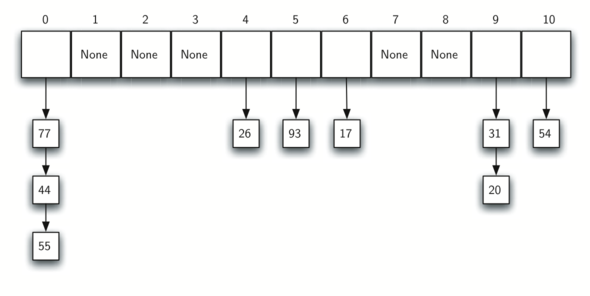

## Hash Tables as a Data Structure


Hash Tables 
* don't guarantee any particular ordering - it all depends on what the hash function does
* __bad__ for ADTs that have order or indexes: `UnorderedList`, `OrderedList`, `Queue`, `Stack`, `Deque`
* __good__ for ADTs where order doesn't matter: `Map` and `Set`


## Set ADT

The above examples consider using hash tables as the underlying data structure to implement a __set__ abstract data type - similar to Python's `set` type.
* __Sets__ are a type of abstract data type that allows you to store a list of non-repeated values
* A __set__ is a collection in which the ordering of the values is not important
* The only thing that matters with a set is whether the item is in the set or not
* Duplicates are not allowed
* Python has a built-in set type


The book does not formally define the Set ADT, but we could define it like this:
* `Set()` Create a new, empty set. It returns an empty set collection.
* `add(val)` Add a new value to the set. If the value is already in the set, do nothing.
* `in` Return True for a statement of the form `val in set`, if the given value is in the set, False otherwise.
* `remove(val)` Remove the given value from the set.
* `len()` Return the number of values stored in the set.

In [2]:
items_in_my_fridge = {"milk","eggs","leftovers","soda"}
items_in_my_fridge.add("butter")
items_in_my_fridge.add("butter")
items_in_my_fridge.remove("soda")
print( type(items_in_my_fridge) )
print(items_in_my_fridge)
print( "butter" in items_in_my_fridge )
print( "pop" in items_in_my_fridge )

<class 'set'>
{'butter', 'milk', 'leftovers', 'eggs'}
True
False


## Implementing the Set ADT with a Chained Hash Table as the underlying data structure

Coding demo

In [3]:
# Example code for your notes

class ChainedHashSet:
    
    def __init__(self,table_size=10):
        self.table = []
        self.table_size = table_size
        for slot in range(self.table_size):
            self.table.append([])
            
    def __repr__(self):
        display_str = ""
        for slot in range(self.table_size):
            display_str += str(slot)+":"+str(self.table[slot])+"\n"
        return display_str
    
    def hash_function(self,item):
        return item%self.table_size
    
    def add(self,item):
        hashed_val = self.hash_function(item)
        list_at_slot = self.table[ hashed_val ]
        if not item in list_at_slot:
            list_at_slot.append(item)
    
    
my_set = ChainedHashSet()

my_set.add(13)
my_set.add(56)
my_set.add(193)
my_set.add(84)
my_set.add(73)
my_set.add(264)


print(my_set)        

0:[]
1:[]
2:[]
3:[13, 193, 73]
4:[84, 264]
5:[]
6:[56]
7:[]
8:[]
9:[]



## Group Activity Problem 3

Implement the `__contains__` method - which will allow you to use the `in` operator to check if an item is in the set. 

_Note:_ it should return `True` or `False`


## Group Activity Problem 4

Our hash table will still only store integers. 

Can you think of a strategy that will allow us to put strings in a table?

```
0:[]
1:[]
2:[]
3:['Dr. Mario']
4:[]
5:['Pikachu', 'Kirby']
6:['Sheik', 'Mr. Game and Watch']
7:['Dr. Carlson', 'Jiggly Puff']
8:['Captain Falcon']
9:['Mew Two']
```


_these are the names Prof Manley's kids gave their chicks that hatched_

## Map ADT

Hash tables are also often used to implement the __map__ abstract data type

A __map__ abstract data type stores _key-value_ pairs and allows you to use a _key_ to look up its associated _value_.

A Python dictionary is a map.

There are other data structures you could use to implement a map, such as a list of tuples.


The following is the book's definition of the Map ADT:
* `Map()` Create a new, empty map. It returns an empty map collection.
* `put(key,val)` Add a new key-value pair to the map. If the key is already in the map then replace the old value with the new value.
* `get(key)` Given a key, return the value stored in the map or `None` otherwise.
* `del` Delete the key-value pair from the map using a statement of the form `del map[key]`.
* `len()` Return the number of key-value pairs stored in the map.
* `in` Return True for a statement of the form key in map, if the given key is in the map, False otherwise.


## Chained Hash Map

We could use a similar strategy that we used for set, but store _(key,value)_ tuples

```
0:[(20, 'chicken')]
1:[(31, 'cow')]
2:[]
3:[(93, 'lion')]
4:[(54, 'cat'), (44, 'goat')]
5:[(55, 'pig')]
6:[(26, 'dog')]
7:[(17, 'tiger'), (77, 'bird')]
8:[]
9:[]
```

(maybe this is a map that a zoo uses to look up which animal has each id)

## Group Activity Problem 5

With our set, we did something like this

In [ ]:
    def add(self,item):
        hashed_val = self.hash_function(item)
        list_at_slot = self.table[ hashed_val ]
        if not item in list_at_slot:
            list_at_slot.append(item)

For a map, it would look like this

In [ ]:
    def put(self,key,value):
        hashed_key = self.hash_function(key)
        list_at_slot = self.table[ hashed_key ]
        if not (key,value) in list_at_slot:
            list_at_slot.append((key,value))

What would happen if you tried to change the value associated with a key?

How can you fix it?

In [ ]:
my_map = ChainedHashMap()

my_map.put(20,"Turkey")
my_map.put(20,"Chicken") #should overwrite Turkey

## Built-in Hash Function

Python contains a built-in hash function that you can use.

Be careful, the hash is somewhat randomized and values change every time you re-start your code (this brings issues with saving hashed values to a file, etc.)

In [4]:
print( hash("Star Wars: Episode VII - The Force Awakens (2015)") )

1538015278275964211


## Textbook's Linear-Probed-Hash-Table Map

The following code shows the start of the book's approach to using a Hash Table with linear probing to implement a map.

`self.slots` list stores the keys

`self.data` stores the associated values


In [ ]:
class HashTable:
    def __init__(self):
        self.size = 11
        self.slots = [None] * self.size # keys
        self.data = [None] * self.size  # values
        
    def put(self,key,data):
        hashvalue = self.hashfunction(key,len(self.slots))

        if self.slots[hashvalue] == None:
            self.slots[hashvalue] = key
            self.data[hashvalue] = data
        else:
            if self.slots[hashvalue] == key:
                self.data[hashvalue] = data  #replace
            else:
                nextslot = self.rehash(hashvalue,len(self.slots))
            while self.slots[nextslot] != None and self.slots[nextslot] != key:
                nextslot = self.rehash(nextslot,len(self.slots))

            if self.slots[nextslot] == None:
                self.slots[nextslot]=key
                self.data[nextslot]=data
            else:
                self.data[nextslot] = data #replace

    def hashfunction(self,key,size):
         return key%size

    def rehash(self,oldhash,size):
        return (oldhash+1)%size